<a href="https://colab.research.google.com/github/Lavanya1602/Tweet-Sentiment-Analysis/blob/main/Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
from dateutil import parser
from IPython.display import Image, HTML, display
import time

# scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC

# nltk-nlp
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


# Ignore all
import warnings
warnings.filterwarnings(action = 'ignore')

In [ ]:
df = pd.read_csv("/content/training.1600000.processed.noemoticon.csv",
                 encoding="ISO-8859-1",
                 names=["sentiment", "ids", "date", "flag", "user", "text"],
                 on_bad_lines='skip') # Skip lines with errors

# Parse the date column using dateutil.parser.parse
df['date'] = df['date'].apply(parser.parse)

df["sentiment"] = df["sentiment"].replace({0: "Negative", 4: "Positive"})

FileNotFoundError: [Errno 2] No such file or directory: '/content/training.1600000.processed.noemoticon.csv'

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/training.1600000.processed.noemoticon.csv",
                 encoding="ISO-8859-1",
                 names=["sentiment", "ids", "date", "flag", "user", "text"],
                 on_bad_lines='skip') # Or you can update your pandas and use error_bad_lines=False

ParserError: Error tokenizing data. C error: EOF inside string starting at row 252966

# **START**

In [ ]:
from zipfile import ZipFile
dataset = '/content/archive (3).zip'
with ZipFile(dataset, 'r') as full:
  full.extractall()
  print('The data is extracted')

The data is extracted


In [ ]:
#dependencies
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
from dateutil import parser
from IPython.display import Image, HTML, display
import time

# scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC

# nltk-nlp
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


# Ignore all
import warnings
warnings.filterwarnings(action = 'ignore')

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#stopwords in english
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [ ]:
df = pd.read_csv("/content/training.1600000.processed.noemoticon.csv",
                 encoding="ISO-8859-1",
                 names=["sentiment", "ids", "date", "flag", "user", "text"],
                 on_bad_lines='skip') # Skip lines with errors

# Parse the date column using dateutil.parser.parse
df['date'] = df['date'].apply(parser.parse)

df["sentiment"] = df["sentiment"].replace({0: "Negative", 4: "Positive"})

In [ ]:
df.head()

,sentiment,ids,date,flag,user,text
0,Negative,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,Negative,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,Negative,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,Negative,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.columns

Index(['sentiment', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   sentiment  1600000 non-null  object        
 1   ids        1600000 non-null  int64         
 2   date       1600000 non-null  datetime64[ns]
 3   flag       1600000 non-null  object        
 4   user       1600000 non-null  object        
 5   text       1600000 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 73.2+ MB


In [ ]:
df.isna().sum()

,0
sentiment,0
ids,0
date,0
flag,0
user,0
text,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
print(f"Total number of unique tweets are {len(df['ids'].unique())}.")
print(f"The period of available data: From {df['date'].dt.to_period('d').min()} to {df['date'].dt.to_period('d').max()}.")
print(f"The number of unique users are {len(df['user'].unique())}.")
print(f"Total number of unique tweets are {len(df['ids'].unique())}.")
print(f"The period of available data: From {df['date'].dt.to_period('d').min()} to {df['date'].dt.to_period('d').max()}.")
print(f"The number of unique users are {len(df['user'].unique())}.")
print(f"The types flags used: {', '.join(df['flag'].unique())}.")
print(f"Sentiment types: {', '.join(map(str, df['sentiment'].unique()))}.")
print(f"The types flags used: {', '.join(df['flag'].unique())}.")
print(f"Sentiment types: {', '.join(map(str, df['sentiment'].unique()))}.")

Total number of unique tweets are 1598315.
The period of available data: From 2009-04-06 to 2009-06-25.
The number of unique users are 659775.
Total number of unique tweets are 1598315.
The period of available data: From 2009-04-06 to 2009-06-25.
The number of unique users are 659775.
The types flags used: NO_QUERY.
Sentiment types: Negative, Positive.
The types flags used: NO_QUERY.
Sentiment types: Negative, Positive.


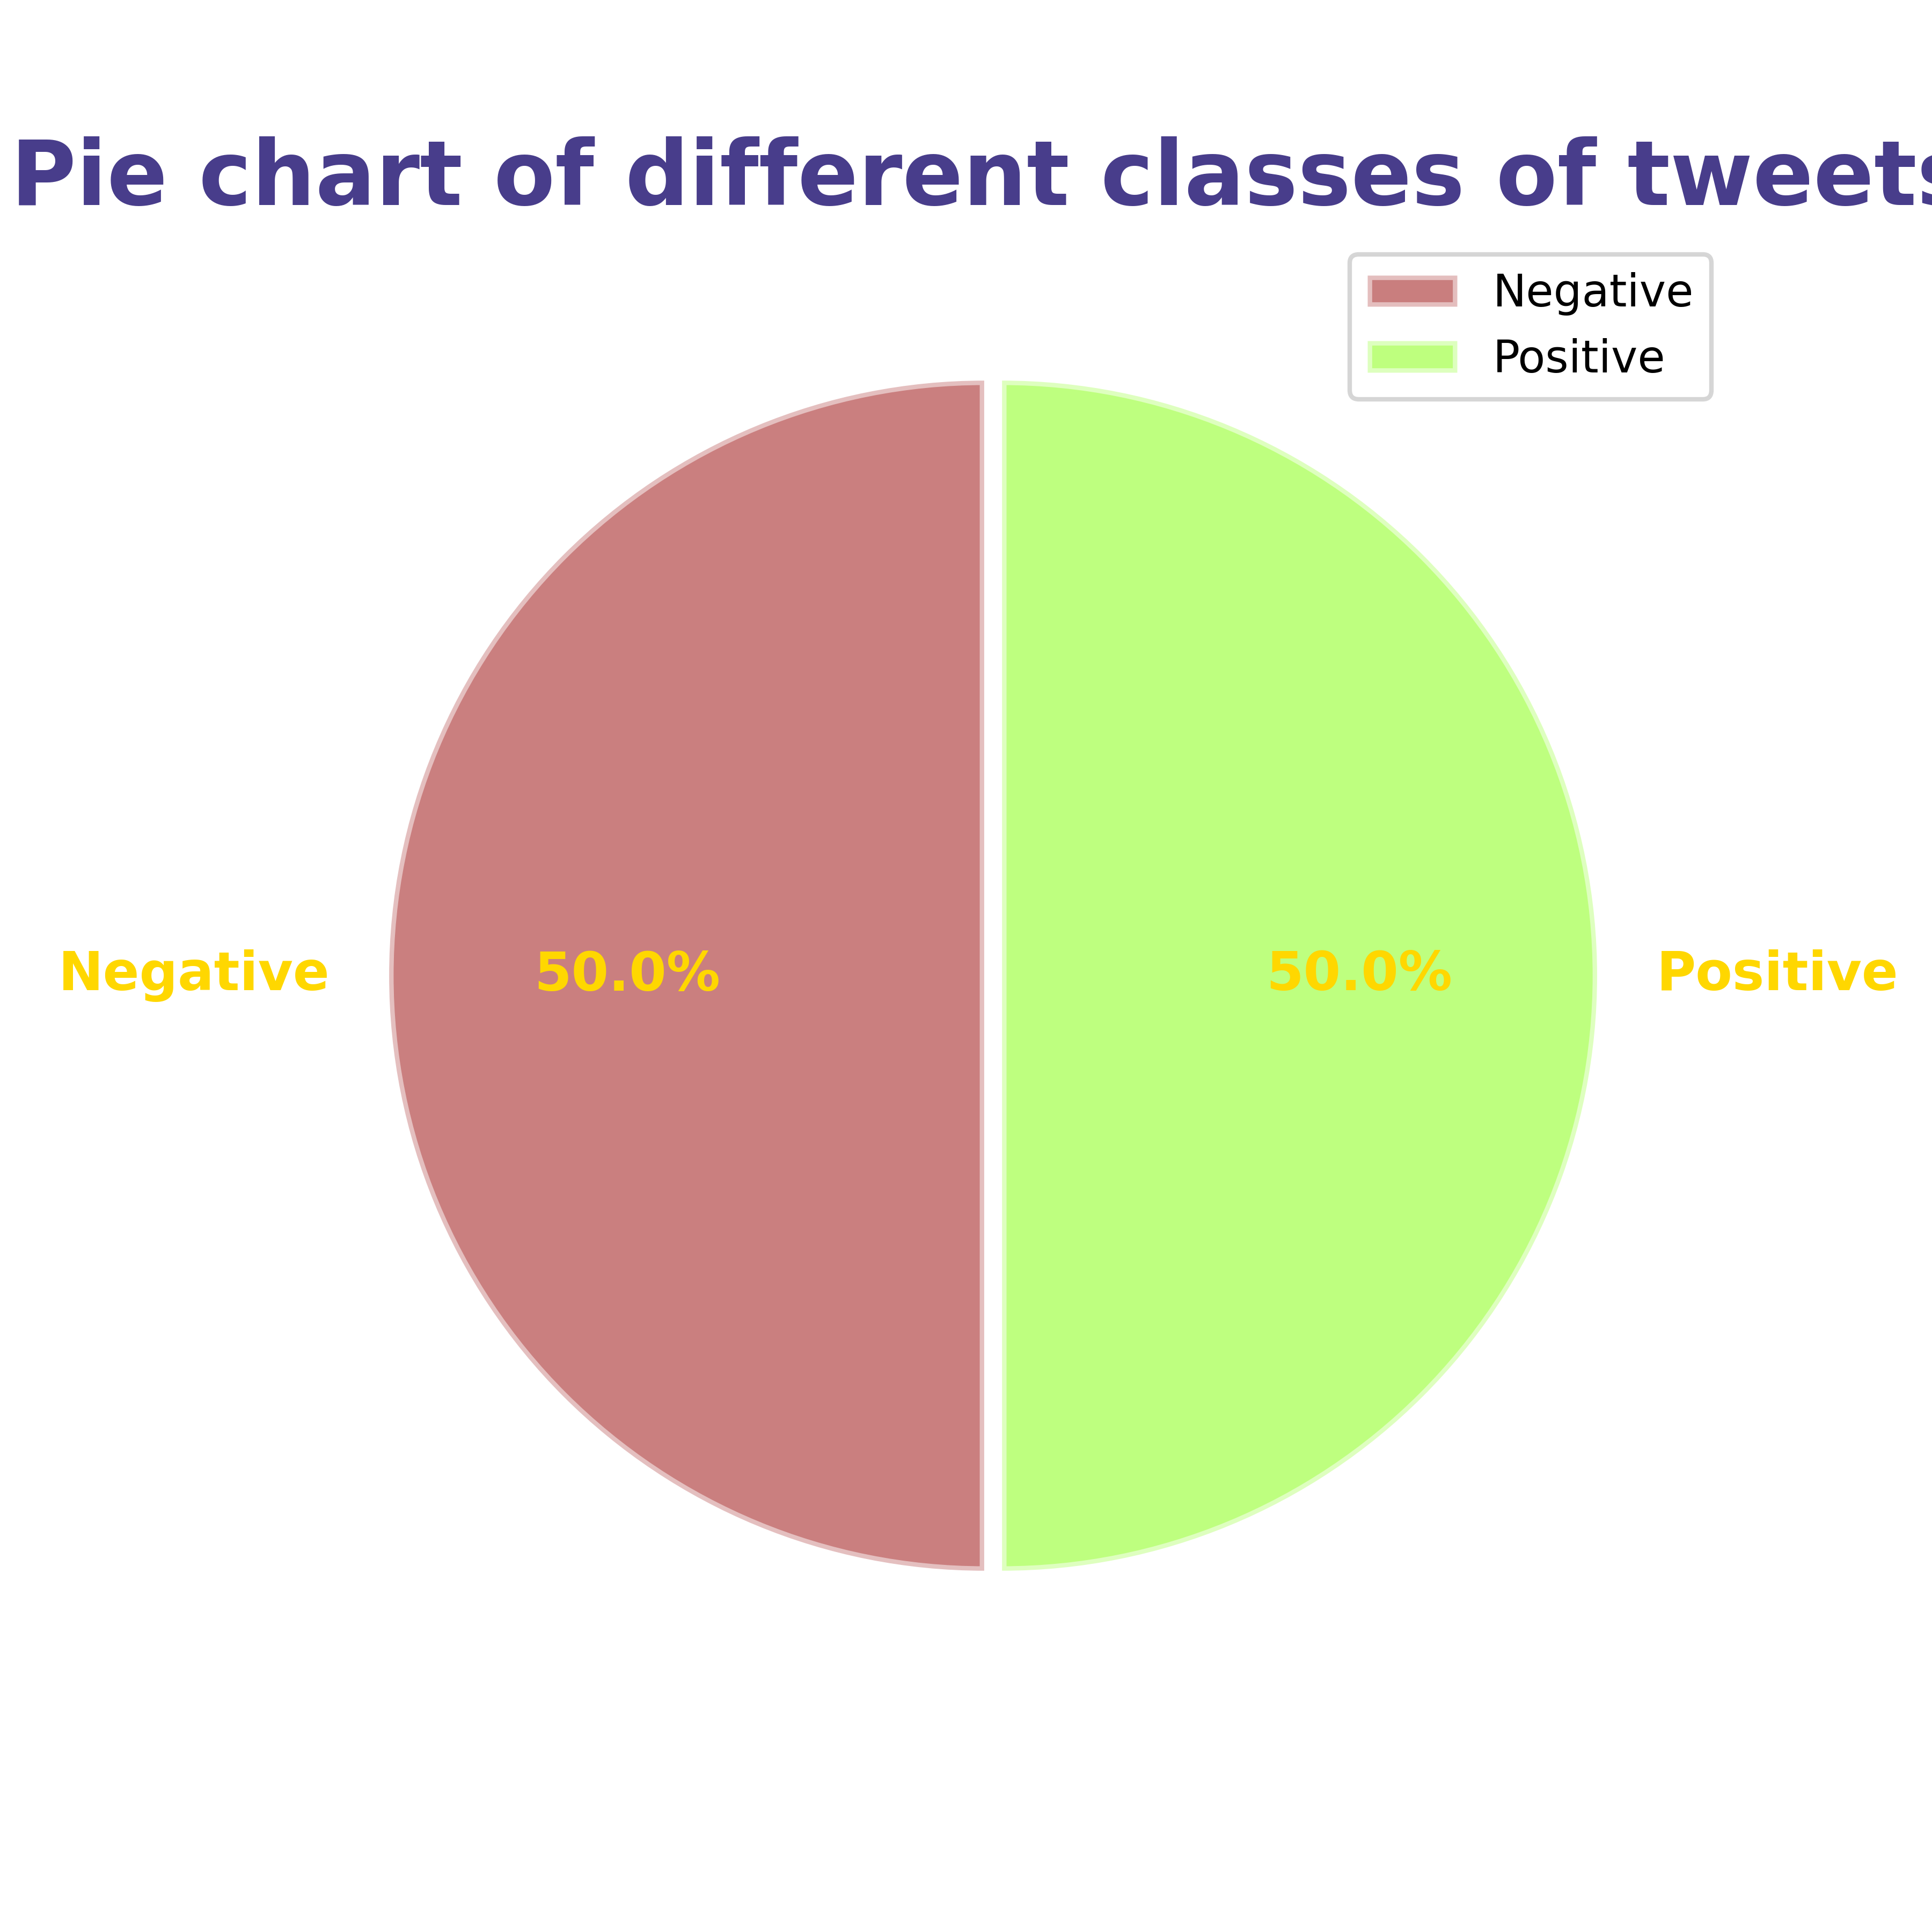

In [ ]:
plt.figure(figsize=(6,6))

plt.pie(df.groupby('sentiment').size(),
        colors=['#960000','#7FFF00'],
        labels=["Negative", "Positive"],
        wedgeprops = {'edgecolor': 'w', 'linewidth': 2, 'alpha':0.5},
        textprops = {'fontname': 'Comic Sans MS', 'fontsize': 12, 'fontweight': 'bold', 'color':'Gold'},
        explode = [0.01, 0.02],
        startangle = 90,
        autopct = '%1.1f%%')

plt.title("Pie chart of different classes of tweets",
          fontdict={'fontname' : 'Comic Sans MS', 'fontsize' : 20, 'fontweight': 'bold', 'color':'DarkSlateBlue'})
plt.ylabel("")
plt.legend()
plt.savefig(r"images\Pie chart of sentiments.png", transparent=True, dpi=600)
plt.close()

Image(r"images\Pie chart of sentiments.png", height=600, width=600)